In [4]:
import numpy as np


In [3]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#For better visuals
sns.set(style='whitegrid')

# To display plots inline in Jupyter Notebook
%matplotlib inline




In [8]:
df_netflix = pd.read_csv("netflix_data.csv")

In [9]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Step1: Defining the questions: 
        
1. What type of content is available in different countries?

2. How has the number of movies/tv shows releases has changed in the last 20 - 30 years?

3. Comparision of tvshows vs movies

4. What is the best time to launch a movie/tv show? 

5. Does Netflix has more focus on TV Shows than movies in recent years?

6. What kind of content works in different countries? Are there any trends or types of content trending in certain regions?

7. In what countries has netflix produced more in recent years?




### Step 2: Data Cleaning

From df.info() above, I can see that there are some null values in title, director, cast, country, dateadded, columns. 

I can also see that datetime is an object datatype, so we gotta change that to date_time datatype. 

In [11]:
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [13]:
df_netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
#Converting the date_added to date_time. 

df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors = 'coerce')

In [19]:
#Now, dealing with null values: 

df_netflix['director'].fillna('Not Available', inplace=True)


In [20]:
df_netflix['cast'].fillna('Not Available', inplace=True)


In [21]:
df_netflix['country'].fillna('Unknown', inplace=True)

In [25]:
#And replacing null values in date_added, rating, duration using mode imputation. - Imputing with most frequent values 

df_netflix['date_added'].fillna(df_netflix['date_added'].mode()[0], inplace=True)

/var/folders/9c/9gm285k54tz9ysvymk9gtd400000gn/T/ipykernel_59190/2967168663.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['date_added'].fillna(df_netflix['date_added'].mode()[0], inplace=True)


In [27]:
df_netflix['rating'].fillna(df_netflix['rating'].mode()[0], inplace=True)
df_netflix['duration'].fillna(df_netflix['duration'].mode()[0], inplace=True)

In [29]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [30]:
#Stripping whitespaces: 

for col in ['type', 'country', 'rating', 'listed_in']:
    df_netflix[col] = df_netflix[col].str.strip()


In [33]:
#Splitting the listed_in genres into columns. 

df_netflix['genres'] = df_netflix['listed_in'].str.split(', ')


In [34]:
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,Not Available,Not Available,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]"


In [35]:
df_exploded = df_netflix.explode('genres')


In [36]:
df_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies


In [41]:
df_netflix.tail(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
8787,s8788,Movie,You Can’t Fight Christmas,Kenny Young,"Brely Evans, Andra Fuller, Persia White, Porsc...",United States,2017-12-19,2017,TV-PG,85 min,"Comedies, Romantic Movies",After stepping in to revitalize his family's h...,"[Comedies, Romantic Movies]"
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro",2016-07-01,2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...","[Dramas, International Movies]"
8789,s8790,Movie,You Changed My Life,Cathy Garcia-Molina,"John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...",Philippines,2019-02-27,2009,TV-PG,116 min,"Comedies, Dramas, International Movies",Laida and Miggy think they've found perfect ha...,"[Comedies, Dramas, International Movies]"
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...,"[Action & Adventure, Comedies]"
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,"[Comedies, Dramas, Independent Movies]"
8792,s8793,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,2016-11-01,1973,NR,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a...","[Action & Adventure, International Movies]"
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,"[Children & Family Movies, Comedies]"
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France",2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,"[Dramas, Independent Movies, International Mov..."
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Not Available,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,"[Anime Series, Kids' TV]"
8796,s8797,TV Show,Yunus Emre,Not Available,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...","[International TV Shows, TV Dramas]"


In [39]:
### What is the type of content available in different countries
content_by_country = df_netflix.groupby(['country', 'type']).size().reset_index(name='count')

print(content_by_country)

                                               country     type  count
0                                    , France, Algeria    Movie      1
1                                        , South Korea  TV Show      1
2                                            Argentina    Movie     38
3                                            Argentina  TV Show     18
4    Argentina, Brazil, France, Poland, Germany, De...    Movie      1
..                                                 ...      ...    ...
844                                          Venezuela    Movie      1
845                                Venezuela, Colombia    Movie      1
846                                            Vietnam    Movie      7
847                                       West Germany    Movie      1
848                                           Zimbabwe    Movie      1

[849 rows x 3 columns]


In [42]:
df_netflix['country_list'] = df_netflix['country'].str.split(', ')

In [43]:
df_netflix_exploded = df_netflix.explode('country_list')

In [58]:
df_netflix_exploded['country_list'].unique()

array(['United States', 'South Africa', 'Unknown', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Senegal', 'S

In [60]:
df_netflix_exploded = df_netflix_exploded[df_netflix_exploded['country_list'] != 'Unknown']

In [61]:
content_by_country = df_netflix_exploded.groupby(['country_list', 'type']).size().reset_index(name='count')

In [62]:
#Lets pivot for comparison: 

pivot_ct = content_by_country.pivot(index='country_list', columns='type', values='count').fillna(0)

pivot_ct


type,Movie,TV Show
country_list,,
,1.0,1.0
Afghanistan,1.0,0.0
Albania,1.0,0.0
Algeria,3.0,0.0
Angola,1.0,0.0
...,...,...
Vatican City,1.0,0.0
Venezuela,4.0,0.0
Vietnam,7.0,0.0


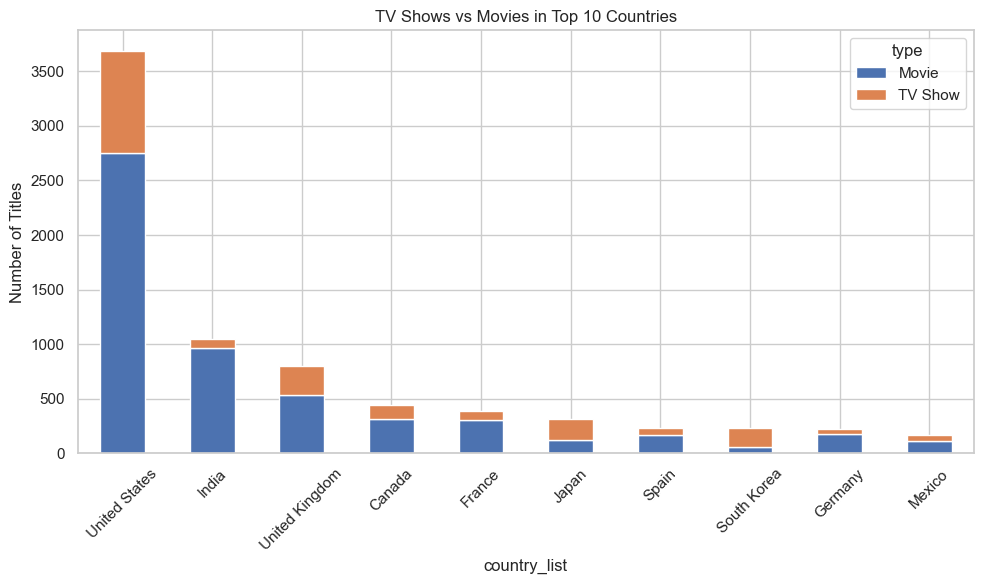

In [63]:
top_countries = pivot_ct.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_ct.loc[top_countries].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("TV Shows vs Movies in Top 10 Countries")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The above visualisation highlights the top 10 countries contributing the most content on netlfix. The United States tops the chart, followed by India, the UK, Canada, France and others. The bar chart, shows how different types of content varies in different countries. We can see that South Korea has relatively higher share of TV Shows than movies, while  India and US are skewed towards movies than tv shows. 

In [55]:
df_netflix_exploded['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [56]:
df_netflix_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       10845 non-null  object        
 1   type          10845 non-null  object        
 2   title         10845 non-null  object        
 3   director      10845 non-null  object        
 4   cast          10845 non-null  object        
 5   country       10845 non-null  object        
 6   date_added    10845 non-null  datetime64[ns]
 7   release_year  10845 non-null  int64         
 8   rating        10845 non-null  object        
 9   duration      10845 non-null  object        
 10  listed_in     10845 non-null  object        
 11  description   10845 non-null  object        
 12  genres        10845 non-null  object        
 13  country_list  10845 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 1.2+ MB


In [66]:
# How has the number of Movies and TV Shows added to Netflix changed over the last 20–30 years?

df_recent = df_netflix_exploded[df_netflix_exploded['release_year'] >= 1995]
df_recent

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],United States
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",South Africa
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV...",India
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,"[British TV Shows, Reality TV]",United Kingdom
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"[Comedies, Dramas]",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,"[Dramas, International Movies, Thrillers]",Jordan
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Cult Movies, Dramas, Thrillers]",United States
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]",United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]",United States


In [68]:
content_trend = df_recent.groupby(['release_year', 'type']).size().reset_index(name='count')
content_trend

,release_year,type,count
0,1995,Movie,23
1,1995,TV Show,2
2,1996,Movie,19
3,1996,TV Show,4
4,1997,Movie,41
5,1997,TV Show,10
6,1998,Movie,38
7,1998,TV Show,6
8,1999,Movie,41
9,1999,TV Show,9


/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

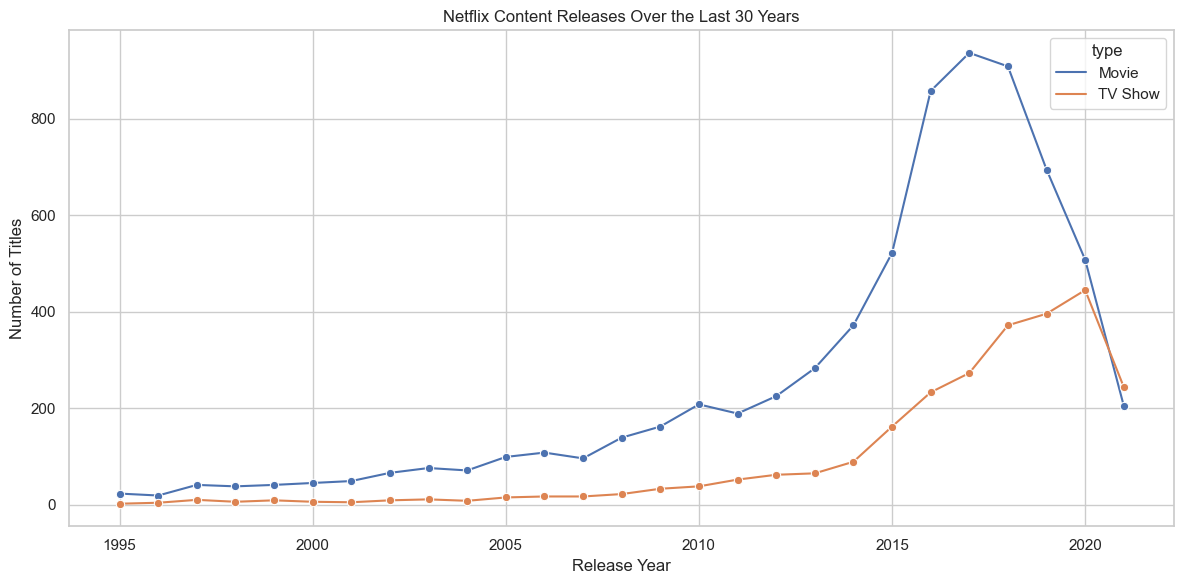

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')
plt.title("Netflix Content Releases Over the Last 30 Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


From 1995 to 2019, netflix added significantly more movies than TV Shows to its platform. However, starting in 2020, there's a visible decline in movie additions - possibly due to pandemic-related production delays or a strategic pivot. 

Interestingly, the number of TV Shows remained mre stable suggesting that serialised content became a more consistent investment area. This shift highlights Netflix’s growing emphasis on binge-worthy TV formats post-2019.


In [73]:
df_netflix_exploded = df_netflix_exploded.explode('genres')
df_netflix_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,United States
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas,South Africa
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries,South Africa
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies,United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies,United States
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas,India
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies,India


In [78]:
#3. Next question is what are the genres that are growing in popularity over the years?

genre_trend = df_netflix_exploded.groupby(['genres', 'release_year']).size().reset_index(name='count')
genre_trend = genre_trend[genre_trend['release_year'] >= 2000]


In [79]:
top_genres = df_netflix_exploded['genres'].value_counts().head(8).index
genre_trend_filtered = genre_trend[genre_trend['genres'].isin(top_genres)]


/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

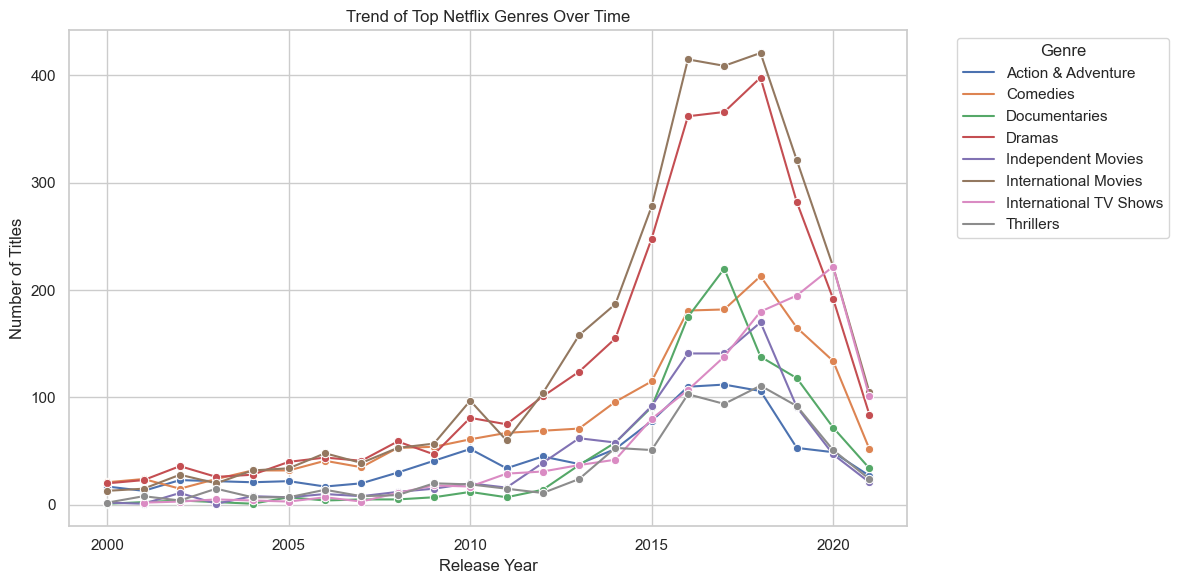

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trend_filtered, x='release_year', y='count', hue='genres', marker='o')
plt.title("Trend of Top Netflix Genres Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Over the last decade, Netflix has shown a clear emphasis on International Movies, which consistently outpaced other genres in volume — peaking around 2019. This suggests a strategic investment in global storytelling and cross-border appeal. The growth in International TV Shows also supports this trend, reflecting Netflix’s focus on localized yet scalable content. Meanwhile, genres like Documentaries, Thrillers, and Independent Movies have grown steadily, but on a smaller scale.

In [86]:
genre_bar = genre_trend_filtered[genre_trend_filtered['release_year'].between(2015, 2023)]


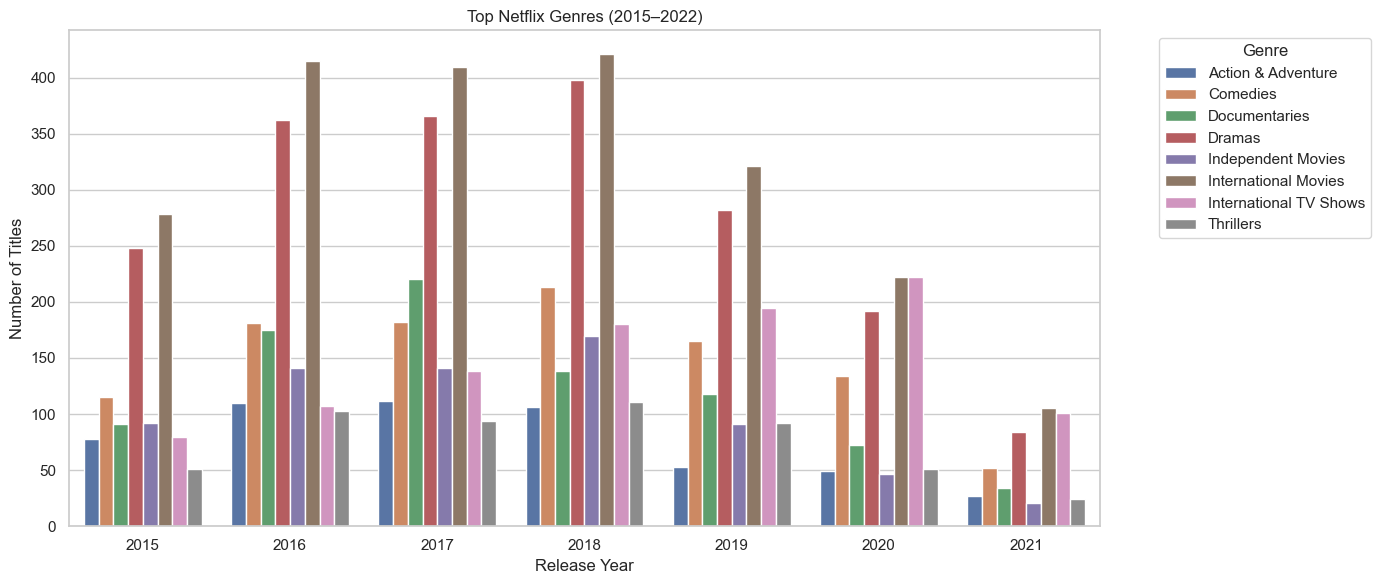

In [87]:
plt.figure(figsize=(14, 6))
sns.barplot(data=genre_bar, x='release_year', y='count', hue='genres')
plt.title("Top Netflix Genres (2015–2022)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [91]:
df_netflix_exploded['genres'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Romantic TV Shows', 'TV Comedies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Reality TV', 'Comedies', 'Crime TV Shows',
       'Spanish-Language TV Shows', 'TV Action & Adventure',
       'Romantic Movies', 'Docuseries', 'Horror Movies',
       'Sci-Fi & Fantasy', 'Thrillers', "Kids' TV", 'Action & Adventure',
       'TV Sci-Fi & Fantasy', 'Classic Movies', 'Anime Features',
       'Anime Series', 'Children & Family Movies', 'Music & Musicals',
       'Sports Movies', 'Korean TV Shows', 'Teen TV Shows', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'TV Horror',
       'Stand-Up Comedy', 'TV Shows', 'Movies', 'Classic & Cult TV',
       'Science & Nature TV', 'TV Thrillers',
       'Stand-Up Comedy & Talk Shows'], dtype=object)

In [96]:
#Next up, we are trying to find what genres grew the most in the years 2020 - 2021:

pandemic_df = df_netflix_exploded[df_netflix_exploded['release_year'].isin([2020, 2021])]
pandemic_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,United States
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas,South Africa
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries,South Africa
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,s8126,TV Show,Super Wings,Not Available,"Luca Padovan, Evan Smolin, Junah Jang, Colin C...","United States, South Korea, China",2020-12-01,2020,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows",A cheerful jet and his transforming pals striv...,Korean TV Shows,China
8132,s8133,TV Show,Surviving R. Kelly Part II: The Reckoning,Not Available,R. Kelly,United States,2020-04-13,2020,TV-MA,1 Season,"Crime TV Shows, Docuseries",As more women come forward with harrowing accu...,Crime TV Shows,United States
8132,s8133,TV Show,Surviving R. Kelly Part II: The Reckoning,Not Available,R. Kelly,United States,2020-04-13,2020,TV-MA,1 Season,"Crime TV Shows, Docuseries",As more women come forward with harrowing accu...,Docuseries,United States
8437,s8438,TV Show,The Netflix Afterparty,Not Available,"David Spade, London Hughes, Fortune Feimster",United States,2021-01-02,2021,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies","Hosts David Spade, Fortune Feimster and London...",Stand-Up Comedy & Talk Shows,United States


In [99]:
#grouping by year and genre: 

genre_pandemic_trend = pandemic_df.groupby(['release_year', 'genres']).size().reset_index(name='count')

top_genres = genre_pandemic_trend.groupby('genres')['count'].sum().sort_values(ascending=False).head(7).index
filtered_trend = genre_pandemic_trend[genre_pandemic_trend['genres'].isin(top_genres)]



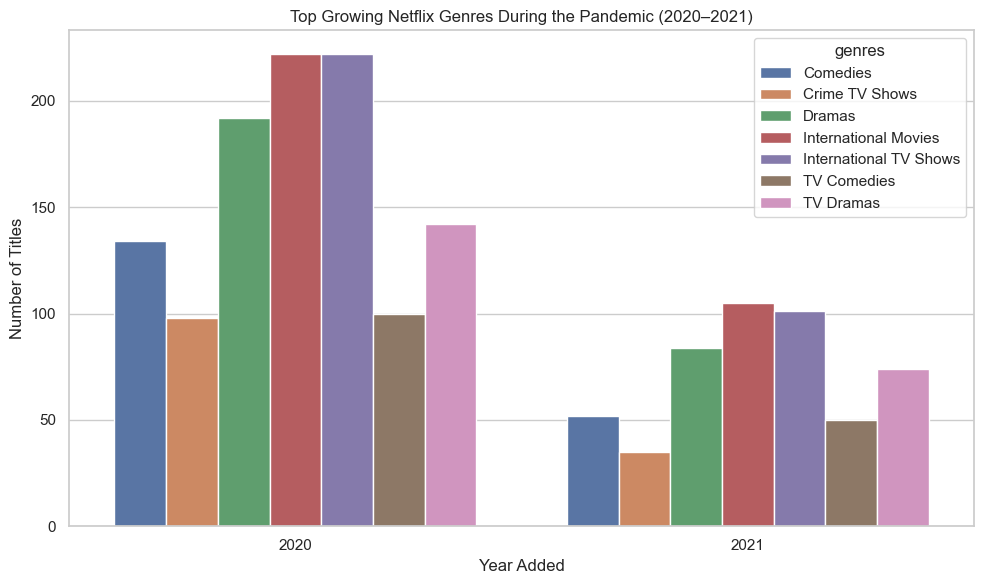

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_trend, x='release_year', y='count', hue='genres')
plt.title("Top Growing Netflix Genres During the Pandemic (2020–2021)")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


During the pandemic year 2020, Netflix saw a sharp increase in international content, particularly International Movies and International TV Shows, each surpassing 200 new titles. This trend likely reflects two key strategies:

(1) tapping into existing global content catalogs during a production slowdown, and 

(2) catering to increased international demand as global viewership surged during lockdowns. Even in 2021, these categories remained among the top despite overall volume dropping across all genres. This supports continued investment in globally relevant, culturally diverse content libraries.

In [ ]:
#How old is the content on Netflix by country or genre? 

#Is Netflix adding fresh, recently released content, or licensing older shows/movies?

In [103]:
df_netflix_exploded['release_year'] = df_netflix_exploded['release_year'].astype(int)
df_netflix_exploded['date_added'] = pd.to_datetime(df_netflix_exploded['date_added'], errors='coerce')
df_netflix_exploded['year_added'] = df_netflix_exploded['date_added'].dt.year


In [105]:
df_netflix_exploded['content_age_at_add'] = df_netflix_exploded['year_added'] - df_netflix_exploded['release_year']


In [107]:
df_netflix_exploded = df_netflix_exploded[df_netflix_exploded['content_age_at_add'].notnull() & (df_netflix_exploded['content_age_at_add'] >= 0)]


In [108]:
genre_age = df_netflix_exploded.groupby('genres')['content_age_at_add'].mean().sort_values()


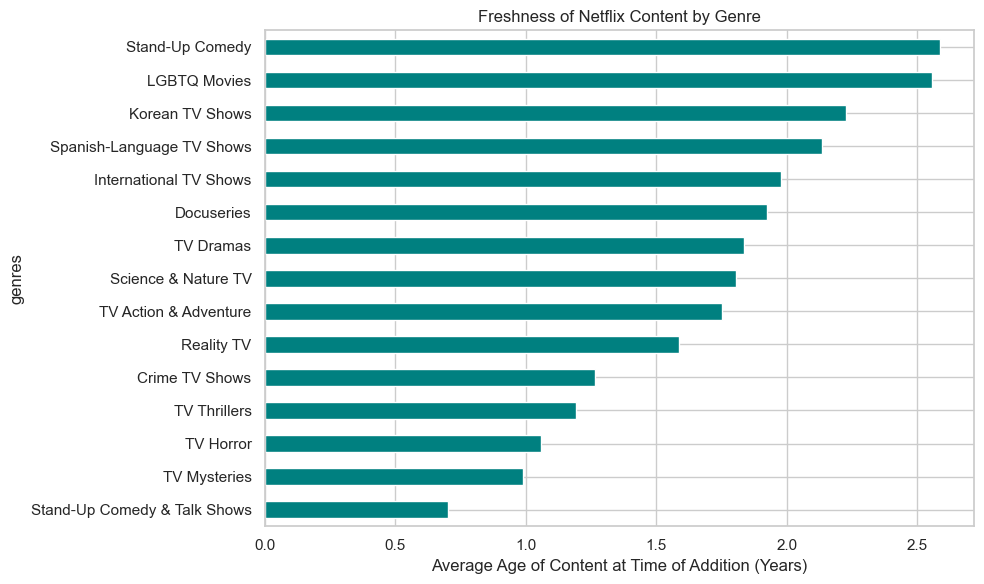

In [109]:
plt.figure(figsize=(10, 6))
genre_age.head(15).plot(kind='barh', color='teal')
plt.xlabel("Average Age of Content at Time of Addition (Years)")
plt.title("Freshness of Netflix Content by Genre")
plt.tight_layout()
plt.show()


Analyzing the average age of content at the time of addition reveals that Netflix tends to add Stand-Up Comedy, LGBTQ Movies, and Korean TV Shows shortly after their release, often within 2–3 years. These genres reflect Netflix’s focus on culturally relevant and time-sensitive formats that benefit from freshness. In contrast, genres like TV Horror and Mysteries have longer licensing windows, suggesting they are more evergreen and less dependent on recency. This freshness pattern indicates where Netflix might prioritize speed-to-platform vs library licensing.

In [110]:
#Whats the avergae duration of movies of genre? 
df_movies = df_netflix_exploded[df_netflix_exploded['type'] == 'Movie'].copy()


In [111]:
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)


In [112]:
avg_duration_by_genre = df_movies.groupby('genres')['duration_minutes'].mean().sort_values()


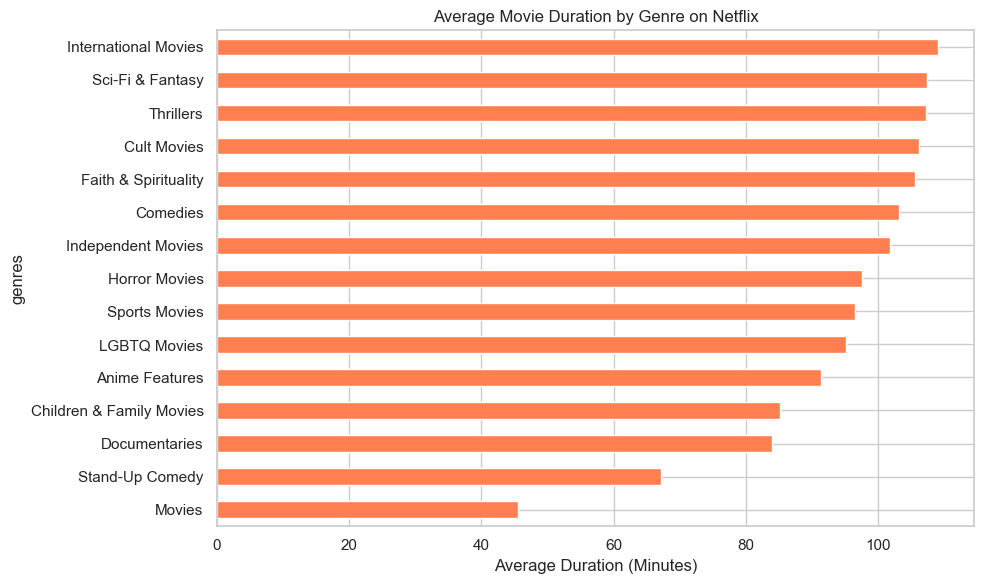

In [114]:
plt.figure(figsize=(10, 6))
avg_duration_by_genre.head(15).plot(kind='barh', color='coral')
plt.xlabel("Average Duration (Minutes)")
plt.title("Average Movie Duration by Genre on Netflix")
plt.tight_layout()
plt.show()


Netflix’s average movie duration varies considerably by genre. International Movies and Sci-Fi & Fantasy genres have the longest runtimes, averaging over 105 minutes, suggesting more in-depth storytelling and complex narratives. In contrast, Stand-Up Comedy, Documentaries, and Children & Family genres are significantly shorter, typically around 70–85 minutes. This reflects user consumption patterns — shorter runtimes in lighter genres and longer sessions for immersive storytelling. These insights help inform Netflix’s content structure by aligning format length with genre expectations

In [116]:
#Are there seasonal patterns in content addition?
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce')
df_netflix['month_added'] = df_netflix['date_added'].dt.month
df_netflix['month_name'] = df_netflix['date_added'].dt.strftime('%B')


In [118]:
monthly_additions = df_netflix.groupby('month_name').size().reset_index(name='count')


In [119]:
from pandas.api.types import CategoricalDtype

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_cat = CategoricalDtype(categories=month_order, ordered=True)
monthly_additions['month_name'] = monthly_additions['month_name'].astype(month_cat)
monthly_additions = monthly_additions.sort_values('month_name')


/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


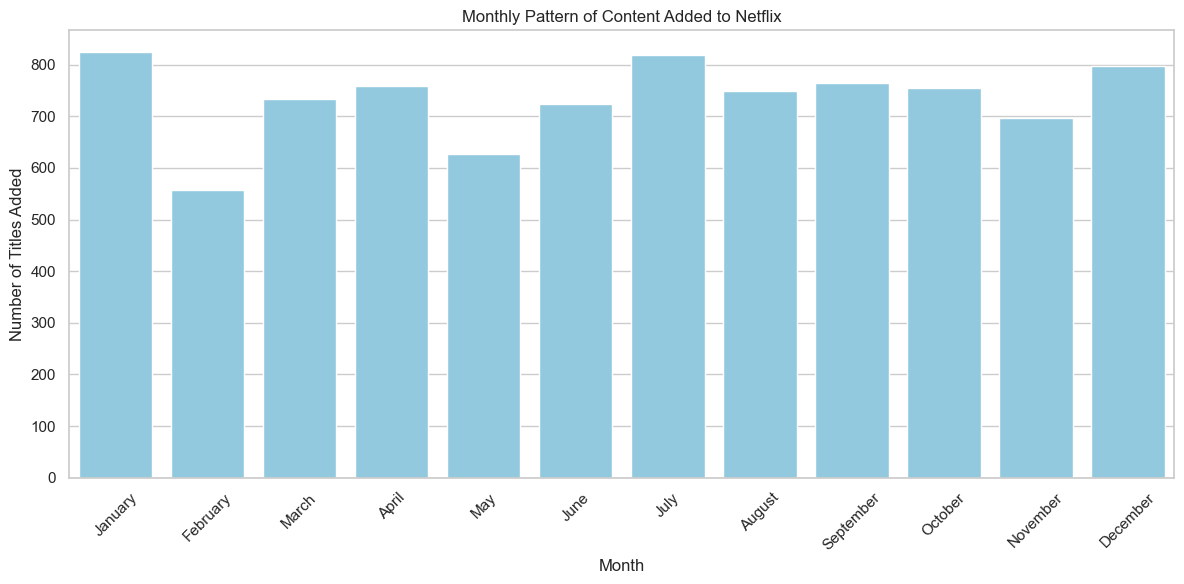

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_additions, x='month_name', y='count', color='skyblue')
plt.title("Monthly Pattern of Content Added to Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The monthly content release pattern reveals that Netflix front-loads the year in January, potentially to capitalize on New Year viewership spikes and binge behavior. Another peak in July aligns with summer breaks, while a strong push in December suggests a strategy to engage holiday viewers. Despite slight monthly variations, Netflix maintains a consistent release flow, helping ensure a steady supply of content and reducing churn by always having fresh titles available

### Recommendations: 

#### 1. Double Down on International Content
Why? International Movies and International TV Shows consistently lead in volume and growth, especially during the pandemic years.

Strategy:

Increase investment in localized productions (e.g., Korean, Spanish, Indian).

Focus on subtitling, dubbing, and marketing regionally successful titles globally.

Explore regional storytelling formats that have cross-border appeal.

#### 2. Prioritize Fresh, Recently Released Content in Key Genres
Why? Genres like Korean TV Shows, LGBTQ Movies, and Docuseries show strong engagement when content is added within 1–2 years of release.

Strategy:

Shorten licensing/acquisition windows for high-demand genres.

Favor exclusive deals for faster platform access to trending content.


#### 3.Capitalize on Seasonal Peaks
Why: Content addition spikes in January, July, and December align with user binge periods.

Strategy:

Schedule blockbuster drops in those months.

Tease major releases via trailers 1–2 months prior.

Run targeted promotions during low-addition months (e.g., February).